# Insta Bot Project 2

### Login to instagram

In [43]:
###Importing modules 

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time 
from time import sleep
import matplotlib.pyplot as plt
service =Service(executable_path="C:/Users/Shivam Soam/Desktop/Data Science CN/Webdriver/chromedriver_win32/chromedriver.exe")
driver = webdriver.Chrome(service=service)

## Serching for google
driver.get("https://www.google.com")
bot = driver.find_element(By.NAME,"q")

## Searching Instagram on google
bot.send_keys("Instagram")
bot.submit()

##Click on Instagram (Google Search)
bot = driver.find_element(By.CLASS_NAME ,"LC20lb")
bot.click()

##Wait until the instagram home page/Login Page completely loads 
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "_aa4b")]')))
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//button[contains(@class, "_acan")]/div[contains(@class, "_ab8w")]')))

##Find username element on homepage after page loads completely
bot = driver.find_element(By.NAME,"username")
bot.click()

##Entering the username
bot.send_keys("Sampleusername")

##Find password box on homepage 
bot=driver.find_element(By.NAME,"password")
bot.click()

##Entering the password
bot.send_keys("Samplepassword")
bot.submit()

##Finding and click on the login button
bot = driver.find_element(By.CLASS_NAME,"_ab8w")
bot.click()

#Save login info ,it will click on "not now"
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class, "_ac8f")]')))
notnow_btn = driver.find_element(By.XPATH,'//div[contains(@class, "_ac8f")]')
notnow_btn.click()
##Turn on notification , it will click on "not now"
notnow_notification_btn = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class, "_a9-z")]/button[contains(@class,"_a9-- _a9_1")]')))
notnow_notification_btn.click()

### 1.1 Open the first 10 handles and find the top 5 which have the highest number of followers

In [44]:
## searching the food in search bar 
WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[starts-with(@class, "xh8yej3 x1iyjqo2")]/div[2]')))
search = driver.find_element(By.XPATH,'//div[starts-with(@class, "xh8yej3 x1iyjqo2")]/div[2]')
search.click()
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_aauy')))
search_food = driver.find_element(By.CLASS_NAME, '_aauy')
search_food.send_keys("food")
users_list=[]

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4')))
users = driver.find_elements(By.XPATH, '//div[starts-with(@class, "_abm4")]/a/div/div[2]/div/div/div/div')
##Adding top 10 users to the user_list
for i in users:
    if len(i.text)>0:
        us =i.text
        users_list.append(us)
    if len(users_list)>9:
        break
d={}
base_url = 'https://www.instagram.com/'

for i in range(len(users_list)):
    # base url + user url == user account
    curr_url = base_url + users_list[i]
    driver.get(curr_url)
    sleep(5)
    
    #find number of followers & add them in dictionary
    followers = driver.find_element(By.XPATH,'//html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[2]/section/main/div/header/section/ul/li[2]/a/div/span')
    f = followers.get_attribute('title')
    ##print(f)
    fn = int("".join(f.split(',')))
    d[users_list[i]] = fn
    
    
#sort dictionary in reverse order & print top 5 values    
sorted_d = dict(sorted(d.items(), key=lambda x:x[1], reverse=True))
count=0
for i in sorted_d:
    if count==5:
        break
    print(i, sorted_d[i]) 
    count+=1


foodie_incarnate 1461340
foodies_findings 525663
foodiesince96 319125
foodpandits 168573
food.o.holic 113263


### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [45]:
#Creating dictionary for last three days post
post_three_days = {}   
count = 0
top5_users = []     #create list for top5 food handles

#adding top5 food handles in list
for ele in sorted_d:
    if count==5:
        break
    top5_users.append(ele)
    count+=1
    

base_url = 'https://www.instagram.com/'

for i in range(len(top5_users)):
    
    no_of_posts = 0
    
    #go to the food_handle
    curr_url = base_url + top5_users[i]
    driver.get(curr_url)
    sleep(3)
    
    #Iterating the all posts
    posts = driver.find_elements(By.XPATH,'//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        sleep(3)
        j.click()
        sleep(3)
        
        #searching date
        post_date =  driver.find_element(By.XPATH,'//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')
        date = post_date.get_attribute('title').split(' ')[1].split(',')[0]
        date_int = int(date)
        
        #Date within 3 days
        if date_int<11:
            break
        else:
            no_of_posts+=1 
            
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(2)
    
    post_three_days[top5_users[i]] = no_of_posts
    

print(post_three_days)        
       
            

{'foodie_incarnate': 0, 'foodies_findings': 0, 'foodiesince96': 0, 'foodpandits': 0, 'food.o.holic': 2}


### 1.3 Depict this information using a suitable graph

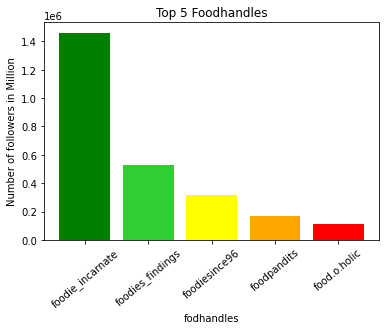

In [46]:
foodhandles_followers = []
foodhandles=[]
count=0
for ele in sorted_d:
    if count==5:
        break
    foodhandles_followers.append(sorted_d[ele])
    foodhandles.append(ele)
    count+=1

plt.bar(foodhandles, foodhandles_followers , color=['green', 'limegreen', 'yellow', 'orange', 'red'])
plt.xlabel('fodhandles')
plt.ylabel('Number of followers in Million')
plt.xticks(rotation = 40)
plt.title('Top 5 Foodhandles')
plt.show()

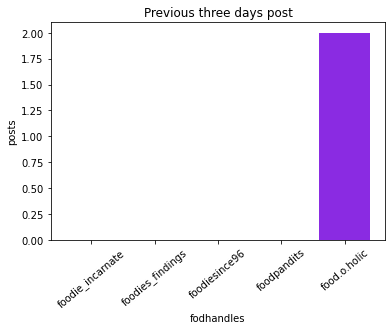

In [47]:
posts = []
foodhandles=[]
count=0
for ele in post_three_days:
    if count==5:
        break
    posts.append(post_three_days[ele])
    foodhandles.append(ele)
    count+=1
    
plt.bar(foodhandles, posts,color='blueviolet')
plt.xlabel('fodhandles')
plt.ylabel('posts')
plt.xticks(rotation = 40)
plt.title('Previous three days post')
plt.show()

### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [48]:
list_of_words = []
foodhandles_top5 = []
c=0
for ele in sorted_d:
    if c==5:
        break
    foodhandles_top5.append(ele)
    c+=1

base_url = 'https://www.instagram.com/'
for i in range(len(foodhandles_top5)):
    #for per food handle page
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(3)
    count=0
    
    #for all posts in that food handle
    posts = driver.find_elements(By.XPATH,'//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        if count==10:
            break
        sleep(3)
        j.click()
        sleep(3)
        
        #find text of post & add all words in list
        post_details = driver.find_element(By.XPATH,'//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
        for word in post_details.text.split(' '):
            list_of_words.append(word)
        count+=1
        
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(3)
        
print(list_of_words)    

['Together❤️🧿\n.\n#AmarNishaForever', '#foodieincarnate', '#delhifoodcrush', '4', 'Million', 'Subscribers', 'on', 'YouTube🤩🤩\n.\nWhen', 'i', 'started', 'my', 'YouTube', 'journey', 'back', 'in', 'Dec', '2020,', 'if', 'someone', 'had', 'told', 'me', 'that', "i'll", 'be', 'having', '40,00,000+', 'subscribers', 'a', 'couple', 'of', 'years', 'later,', "i'd", 'have', 'laughed', 'on', 'it.', 'But', 'with', 'loads', 'of', 'hardwork', 'and', 'loads', 'of', 'love', 'that', 'you', 'guys', 'gave', 'me..i', 'have', 'reached', 'this', 'milestone.', "Can't", 'thank', 'you', 'guys', 'enough.❤️❤️\nWill', 'be', 'working', 'even', 'harder', 'to', 'post', 'even', 'better', 'content', 'and', 'keep', 'showing', 'you', 'guys', 'the', 'best', 'vegetarian', 'food', 'on', 'Earth.🤗🤗', 'Lunch', 'scenes', 'from', '@potpot.in', '🤩🤩\n.\nOne', 'of', 'the', 'best', 'eateries', 'in', 'DLF', 'Avenue,', 'Saket👍🏻\n.\n#foodieincarnate', '#foodieincarnaterestaurantreviews', '#newdelhi', '#dlfavenue', 'Crazy', 'Making', 'Pro

### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [49]:
freq = {}
for i in list_of_words:
    if i in freq:
        freq[i]+=1
    else:
        freq[i]=1
        
word_freq = []
for i in freq:
    word_freq.append([i, freq[i]])

print(word_freq)

[['Together❤️🧿\n.\n#AmarNishaForever', 1], ['#foodieincarnate', 1], ['#delhifoodcrush', 1], ['4', 1], ['Million', 1], ['Subscribers', 1], ['on', 13], ['YouTube🤩🤩\n.\nWhen', 1], ['i', 1], ['started', 1], ['my', 14], ['YouTube', 7], ['journey', 1], ['back', 1], ['in', 15], ['Dec', 3], ['2020,', 1], ['if', 1], ['someone', 3], ['had', 2], ['told', 1], ['me', 3], ['that', 4], ["i'll", 1], ['be', 7], ['having', 1], ['40,00,000+', 1], ['subscribers', 1], ['a', 9], ['couple', 2], ['of', 16], ['years', 1], ['later,', 1], ["i'd", 1], ['have', 3], ['laughed', 1], ['it.', 1], ['But', 1], ['with', 12], ['loads', 2], ['hardwork', 1], ['and', 30], ['love', 1], ['you', 7], ['guys', 3], ['gave', 1], ['me..i', 1], ['reached', 1], ['this', 10], ['milestone.', 1], ["Can't", 1], ['thank', 1], ['enough.❤️❤️\nWill', 1], ['working', 1], ['even', 2], ['harder', 1], ['to', 16], ['post', 2], ['better', 1], ['content', 1], ['keep', 1], ['showing', 1], ['the', 31], ['best', 2], ['vegetarian', 1], ['food', 2], ['Ea

### 2.3 Create a csv file with two columns : the word and its frequency

In [61]:
#create pandas dataframe
import pandas as pd
df = pd.DataFrame(word_freq, columns=['Words', 'Frequency'])

#create csv file
df.to_csv('Words_Freq', index = False)

### 2.4 Now, find the hashtags that were most popular among these bloggers

In [51]:
#find popular hashtags
df = df[df['Words'].str.startswith('#')]
popular_hashtags = df.sort_values('Frequency', ascending = False)[0:10]
print(popular_hashtags)

                   Words  Frequency
305           #instafood         17
308            #foodporn         14
311         #foodstagram         13
546               #tasty         13
317        #biryanilover         10
316         #biryanilove         10
297         #chennaifood         10
298  #chennaifoodblogger         10
299    #chennaifoodguide         10
300    #chennaifoodspots         10


### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

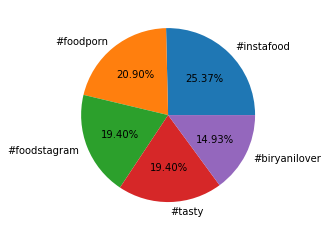

In [52]:
top5_hashtags = popular_hashtags.Words[0:5]
top5_hashtags_freq = popular_hashtags.Frequency[0:5]

#plot pie chart
plt.pie(top5_hashtags_freq, labels = top5_hashtags, autopct = "%.2f%%" )
plt.show()

### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [53]:
foodhandles_top5

['foodie_incarnate',
 'foodies_findings',
 'foodiesince96',
 'foodpandits',
 'food.o.holic']

In [57]:
from selenium.common.exceptions import NoSuchElementException
foodhandles_top5 = []
co=0
for ele in sorted_d:
    if co==5:
        break
    foodhandles_top5.append(ele)
    co+=1
handles_likes = {}
base_url = 'https://www.instagram.com/'
for i in range(len(foodhandles_top5)):
    #for per food handle page
    if i==3:                   #skipped the handle "food"
        continue
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(5)
    count=0
    total_likes = 0
    
    #for all posts in that food handle
    posts = driver.find_elements(By.XPATH,'//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        if count==10:
            break
        sleep(3)
        j.click()
        sleep(3)
        
        try:
            like = driver.find_element(By.XPATH,'//html/body/div[2]/div/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div/span')   
            number_of_likes = int((like.text).replace(',',''))
            total_likes += number_of_likes
            count+=1 
        except NoSuchElementException:
            pass
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(3)
    handles_likes[foodhandles_top5[i]] = total_likes
    
print(handles_likes)


{'foodie_incarnate': 247842, 'foodies_findings': 793261, 'foodiesince96': 15326, 'food.o.holic': 1426861}


foodie_incarnate 247842
foodies_findings 793261
foodiesince96 15326
food.o.holic 1426861


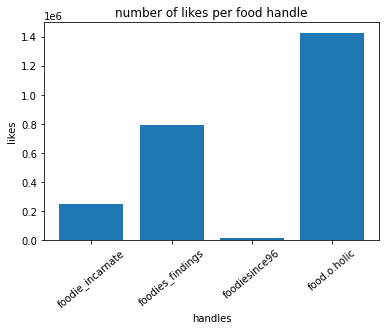

In [58]:
#Create graphs of number of likes per foodhandles
handles = []
likes = []
for i in handles_likes:
    handles.append(i)
    likes.append(handles_likes[i])

for i in range(len(handles)):
    print(handles[i], likes[i])    
    
plt.bar(handles, likes)
plt.xlabel('handles')
plt.xticks(rotation = 40)
plt.ylabel('likes')
plt.title('number of likes per food handle')
plt.show()

### 3.2 Calculate the average likes for a handle

foodie_incarnate 24784.2
foodies_findings 79326.1
foodiesince96 1532.6
food.o.holic 142686.1


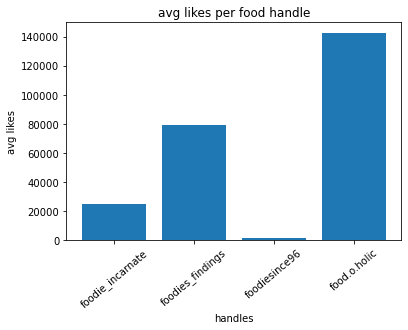

In [59]:
avg_likes = []
for i in likes:
    avg_likes.append(i/10)

for i in range(len(handles)):
    print(handles[i], avg_likes[i])
    
plt.bar(handles, avg_likes)
plt.xlabel('handles')
plt.xticks(rotation = 40)
plt.ylabel('avg likes')
plt.title('avg likes per food handle')
plt.show()

### 3.3 and 3.4 
#### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle and Create a bar graph to depict the above obtained information.

foodie_incarnate 58.9625648598704
foodies_findings 6.626608392445865
foodiesince96 208.22458567140808
food.o.holic 0.7937914064509437


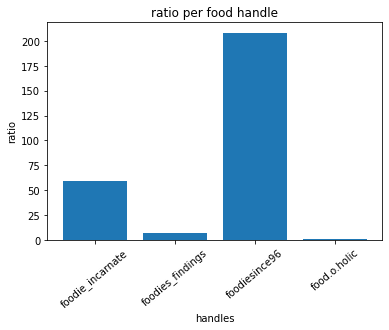

In [60]:
followers = []
for i in range(len(foodhandles_followers)):
    if i==3:
        continue
    followers.append(foodhandles_followers[i])

ratio = []
for i in range(len(followers)):
    ratio.append(followers[i]/avg_likes[i])
    
for i in range(len(followers)):
    print(handles[i], ratio[i])

plt.bar(handles, ratio)
plt.xlabel('handles')
plt.xticks(rotation = 40)
plt.ylabel('ratio')
plt.title('ratio per food handle')
plt.show()